In [20]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r'F:\Data Science\Assignments\8.PCA\wine.csv')

In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Data Pre-processing/ Exploration

In [7]:
# Dropping column Type as it shows pre-defined cluster so it will not contribute much in cluster formation
df.drop(['Type'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
df.isna().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [16]:
df[df.duplicated()]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [17]:
df.shape

(178, 13)

# EDA

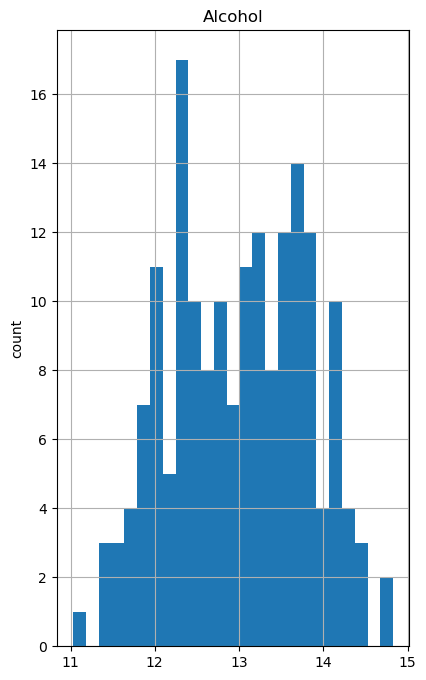

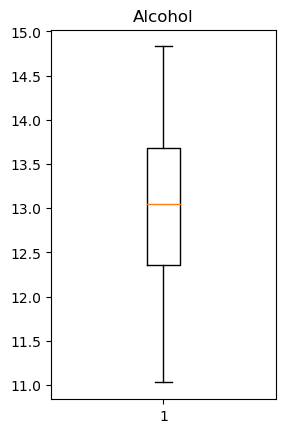

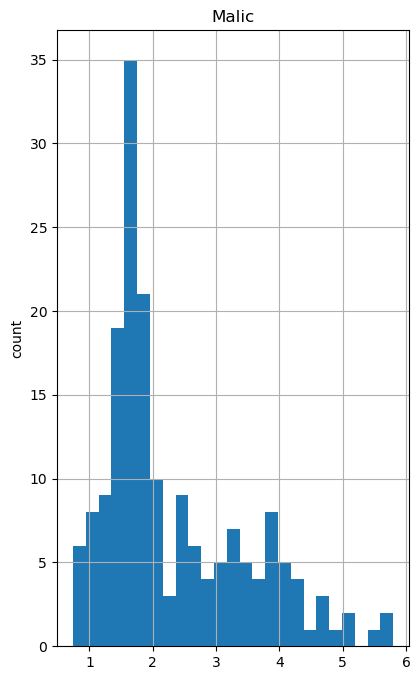

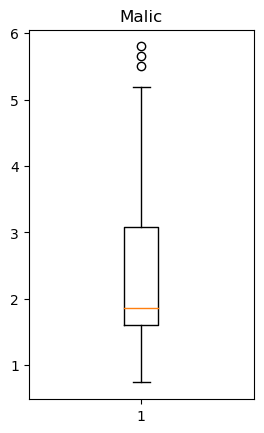

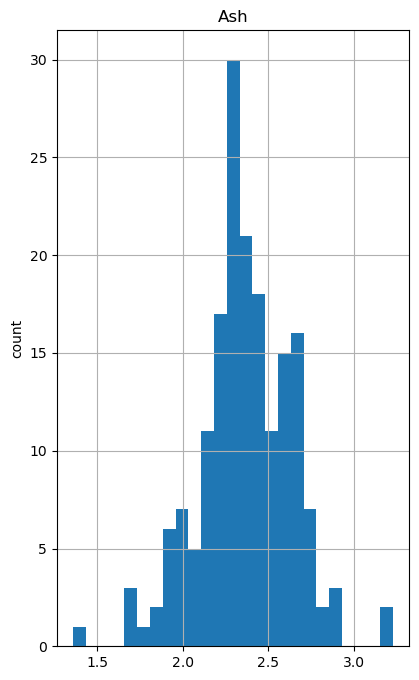

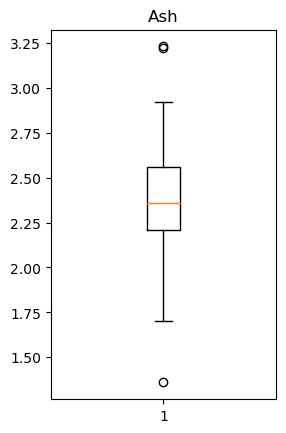

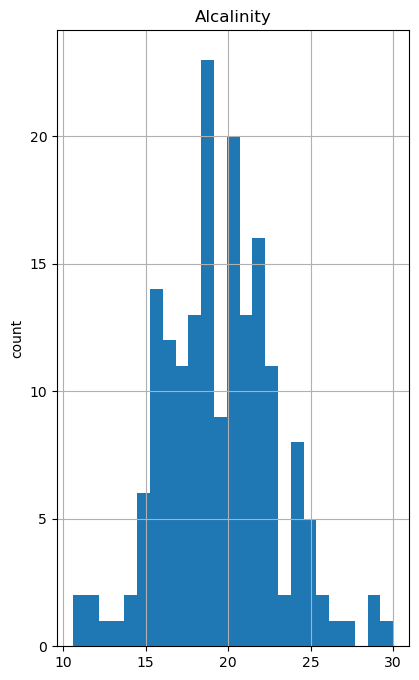

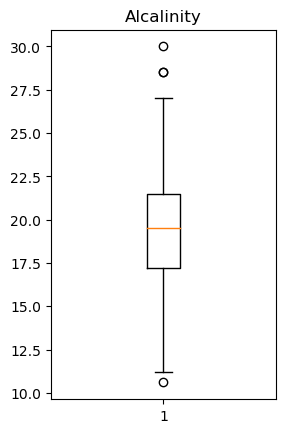

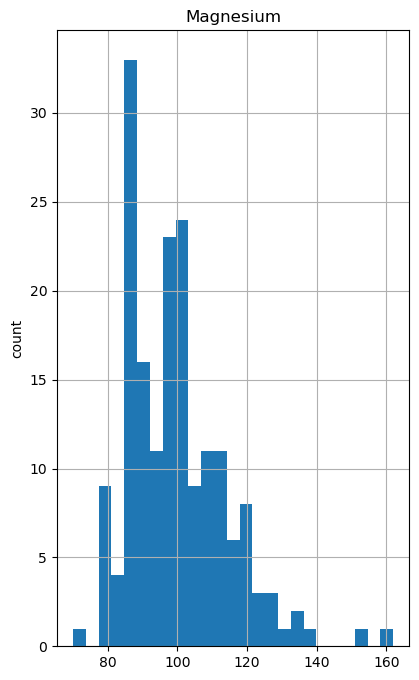

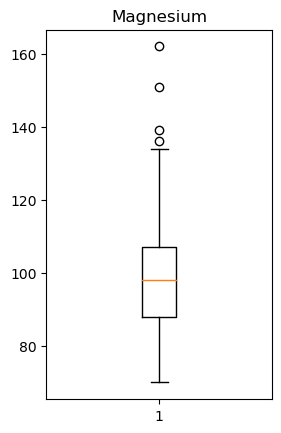

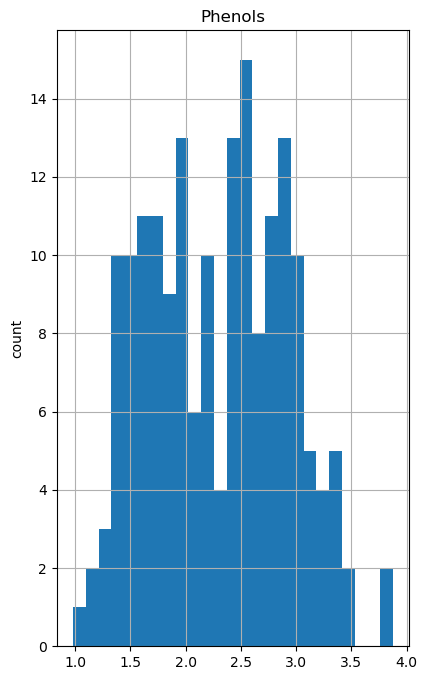

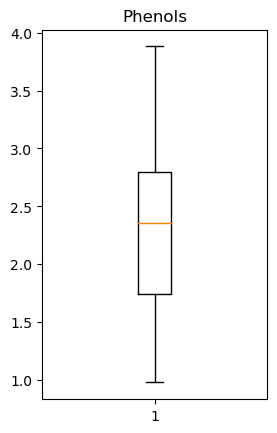

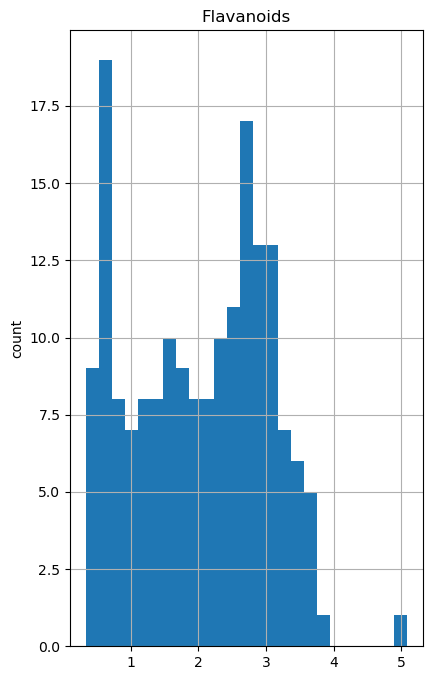

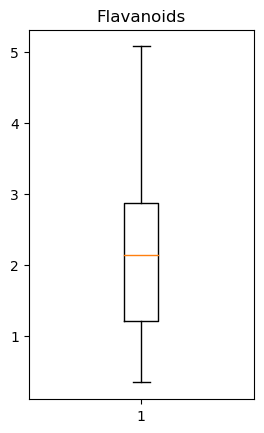

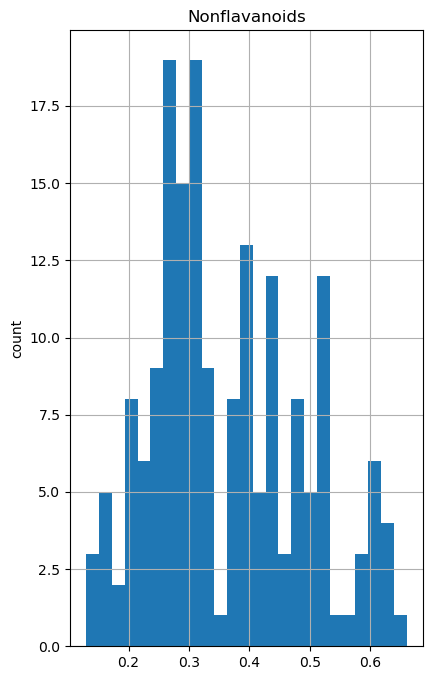

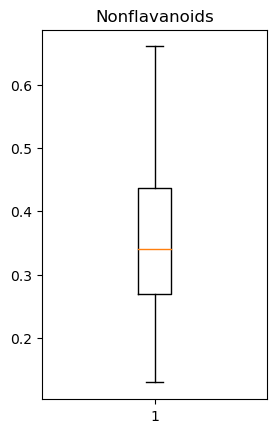

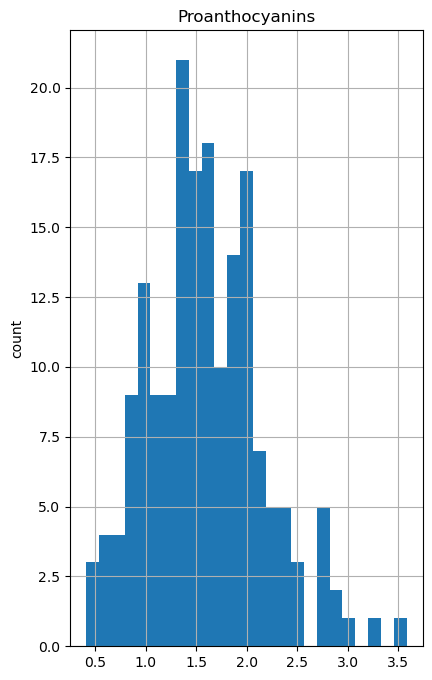

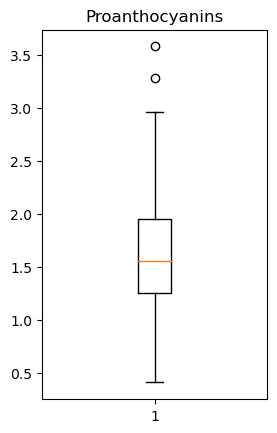

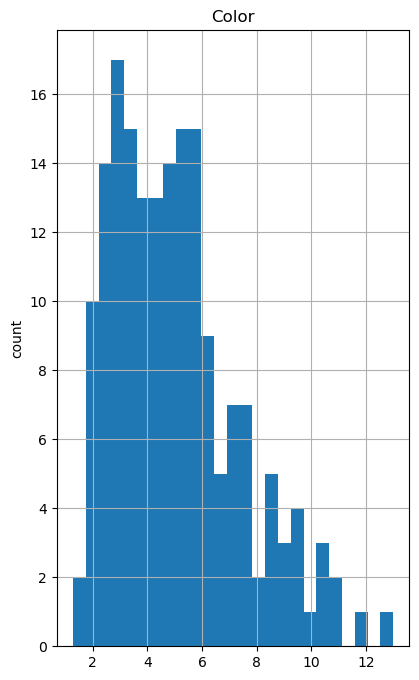

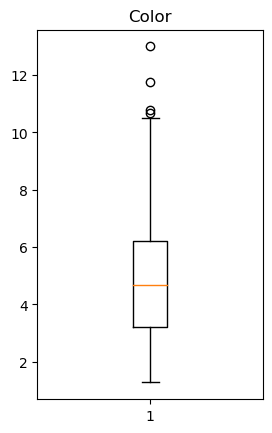

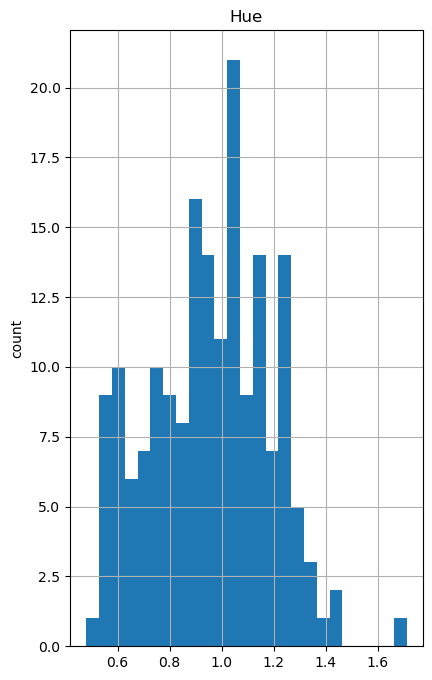

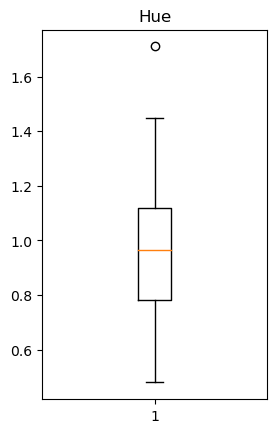

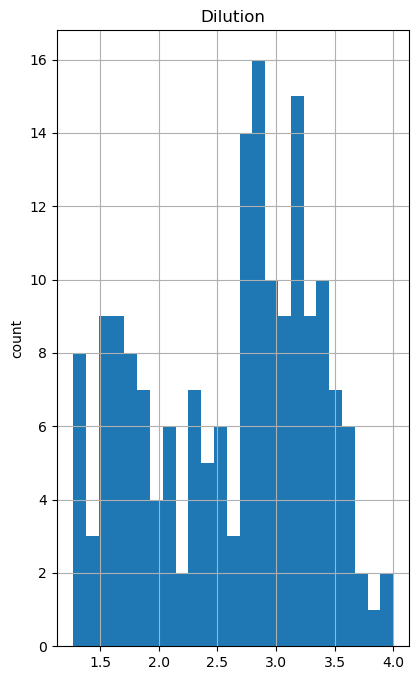

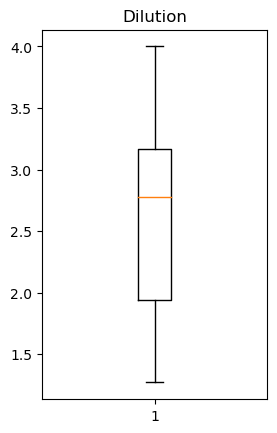

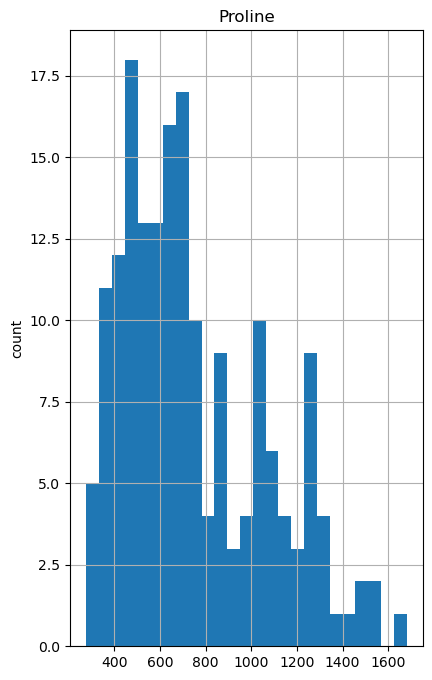

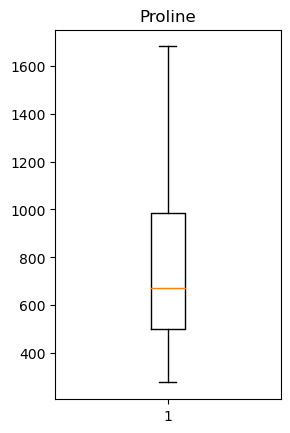

In [27]:
for feature in df.columns:
    
    plt.figure(figsize=(10,8))
    
    plt.subplot(1,2,1)
    df=df.copy()
    df[feature].hist(bins=25)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()
    
    
    
    plt.subplot(1,2,2)
    plt.boxplot(df[feature])
    plt.title(feature)
    plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

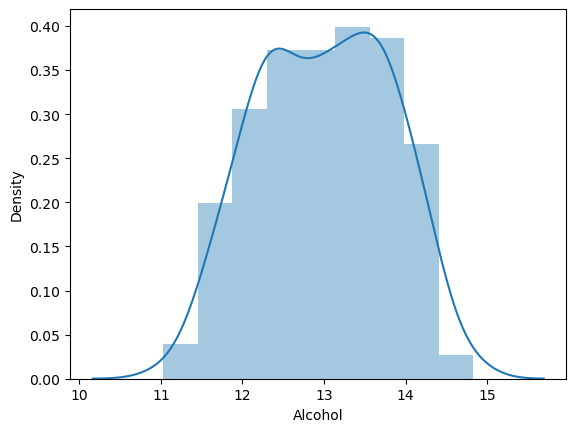

In [28]:
sns.distplot(df['Alcohol'])

# Apply Feature Scaling

In [29]:
df_norm = MinMaxScaler().fit_transform(df)

In [30]:
df_norm = pd.DataFrame(df_norm, columns=df.columns)

In [31]:
df_norm.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


# Applying PCA

In [33]:
pca = PCA()
pca_values = pca.fit_transform(df_norm)
pca_values

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [39]:
pca.components_ # Constant values of PCs

array([[-1.33367664e-01,  2.48515807e-01, -7.39167565e-04,
         1.77838621e-01, -8.86572802e-02, -3.95070868e-01,
        -4.14589792e-01,  3.33108614e-01, -2.52902105e-01,
         9.23290406e-02, -2.51137258e-01, -4.73492101e-01,
        -2.86862112e-01],
       [-5.50883679e-01, -2.27390577e-01, -1.63091200e-01,
         7.97763293e-02, -1.88165658e-01, -7.41447292e-02,
        -1.00692215e-03, -9.96036899e-03, -3.14178847e-02,
        -5.19707496e-01,  2.37206223e-01,  2.15562246e-01,
        -4.43888361e-01],
       [-8.38483848e-02,  4.92039271e-01,  4.03009367e-01,
         4.77242411e-01,  6.55069647e-03,  2.53065140e-01,
         1.96105456e-01,  2.85981862e-01,  2.28342345e-01,
        -3.30999741e-02, -1.06588781e-01,  2.97776289e-01,
        -1.51968292e-01],
       [-4.03281504e-02,  4.86032016e-01, -2.41975652e-01,
        -8.16939916e-02,  1.58801742e-02, -5.26432313e-02,
        -2.70332340e-02, -7.09095281e-01,  7.65736687e-02,
        -2.63220354e-02, -3.52498013e

In [38]:
var = pca.explained_variance_ratio_
var

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

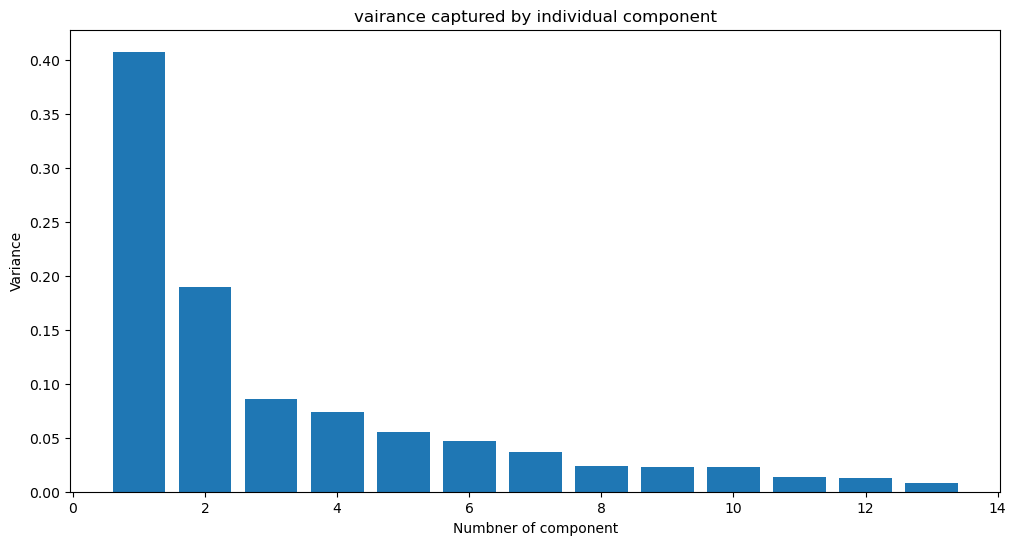

In [44]:
plt.figure(figsize=(12,6))
plt.bar(range(1,len(var)+1), var)

plt.xlabel('Numbner of component')
plt.ylabel('Variance')
plt.title('vairance captured by individual component')
plt.show()

In [41]:
# cummulative Variance

cum_var = np.cumsum(np.round(var,4)*100)
cum_var

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

# Variance plot for PCA components

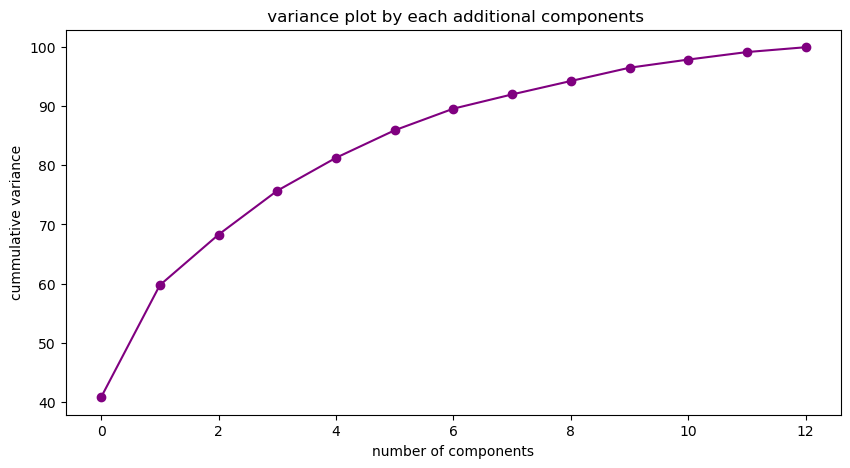

In [50]:
plt.figure(figsize=(10,5))

plt.plot(cum_var, color = 'purple', linestyle='solid', marker='o')
plt.xlabel("number of components")
plt.ylabel('cummulative variance')
plt.title(' variance plot by each additional components')
plt.show()

In [51]:
# Creating df with 3 principla components

df_norm_pca = pd.DataFrame(pca_values[:,0:3], columns=['PC0','PC1','PC2'])

In [52]:
df_norm_pca

,PC0,PC1,PC2
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
...,...,...,...
173,0.739510,-0.471901,0.209360
174,0.581781,-0.348366,0.083590
175,0.626313,-0.546857,-0.030495
176,0.572991,-0.425516,-0.094537


# Hierarchical clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy  as sch
from sklearn.metrics import silhouette_score as slt

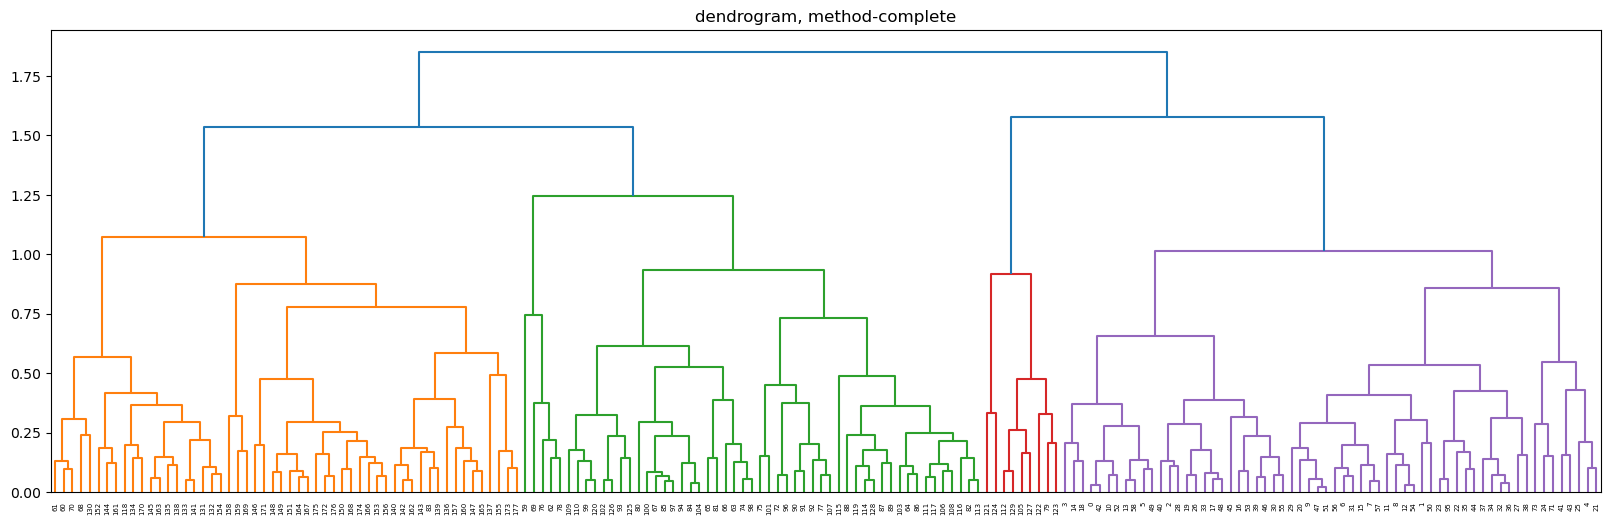

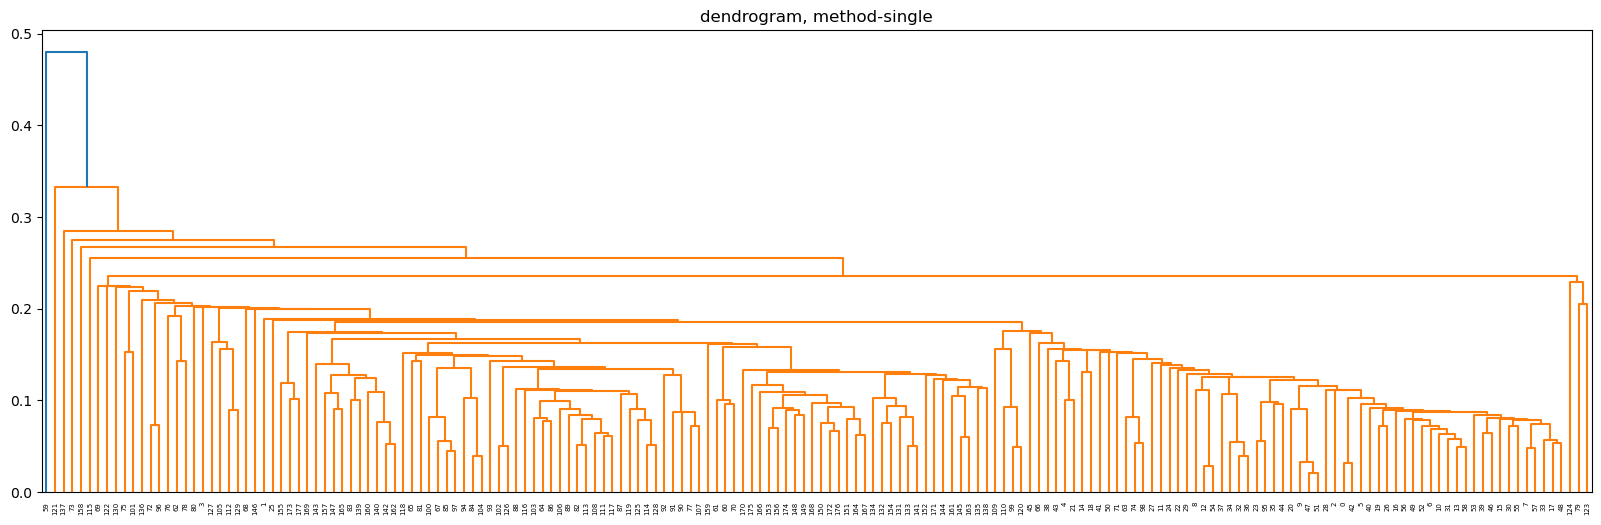

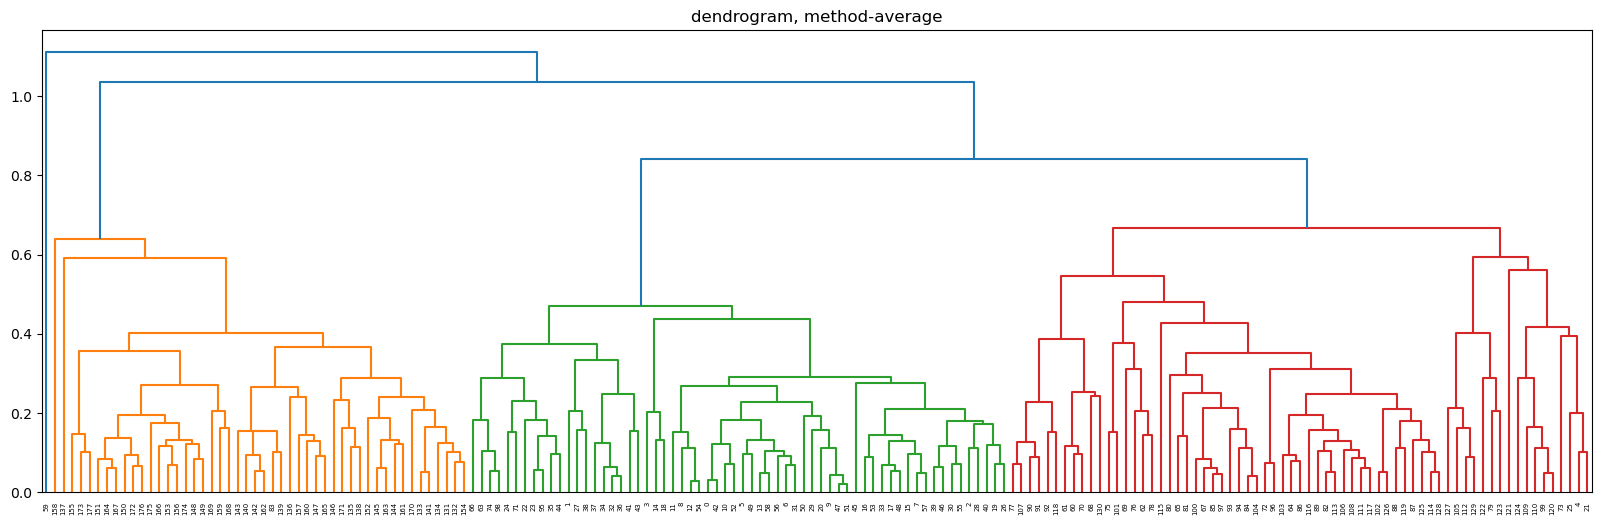

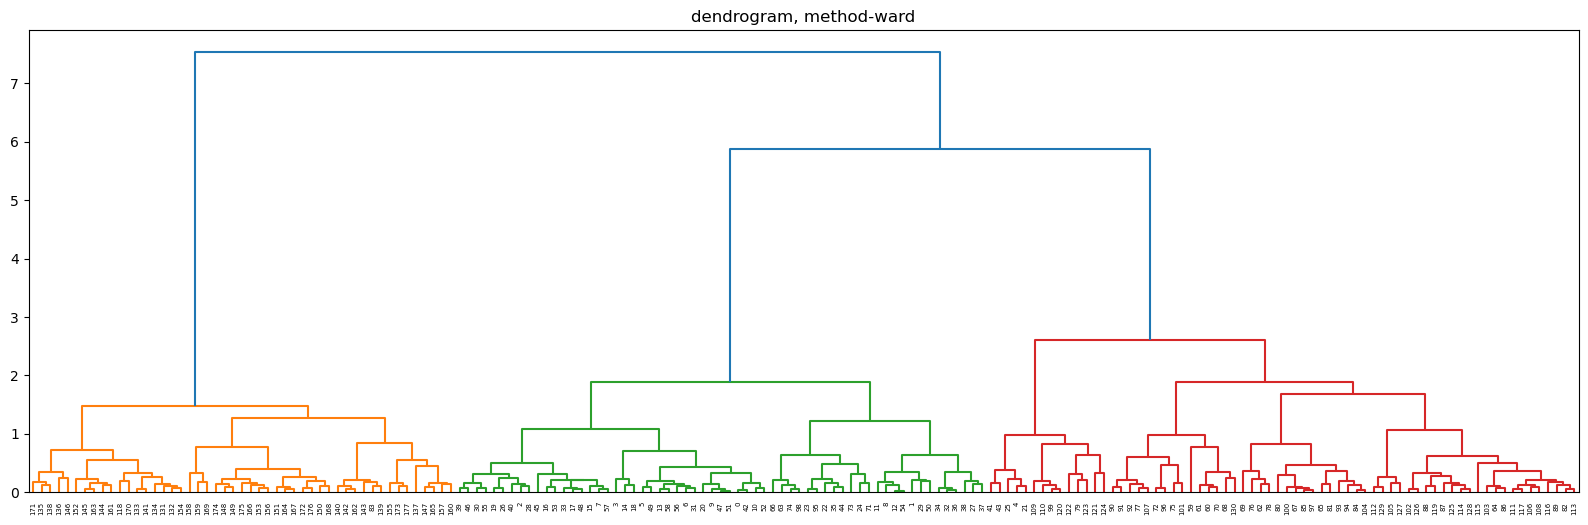

In [62]:
method = ['complete','single','average','ward']
for method in method:
    plt.figure(figsize=(20,6))
    plt.title("dendrogram, method-{}".format(method))
    dendrogram2= sch.dendrogram(sch.linkage(df_norm_pca, method = method, optimal_ordering=False ))
    

In [67]:
linkage = ['single','complete','ward','average']

for i in range (2,8):
    for x in linkage:
        hc = AgglomerativeClustering(n_clusters=i , linkage=x)
        y_hc = hc.fit_predict(df_norm_pca)
        sil_score = slt(df_norm_pca, y_hc)
        print('For n=',i ,'and linkage=',x ,'silhouette score is :', np.round(sil_score,4))


For n= 2 and linkage= single silhouette score is : 0.2657
For n= 2 and linkage= complete silhouette score is : 0.3385
For n= 2 and linkage= ward silhouette score is : 0.4276
For n= 2 and linkage= average silhouette score is : 0.2657
For n= 3 and linkage= single silhouette score is : 0.1421
For n= 3 and linkage= complete silhouette score is : 0.2801
For n= 3 and linkage= ward silhouette score is : 0.4596
For n= 3 and linkage= average silhouette score is : 0.3905
For n= 4 and linkage= single silhouette score is : -0.0004
For n= 4 and linkage= complete silhouette score is : 0.4451
For n= 4 and linkage= ward silhouette score is : 0.4238
For n= 4 and linkage= average silhouette score is : 0.4472
For n= 5 and linkage= single silhouette score is : -0.2007
For n= 5 and linkage= complete silhouette score is : 0.4163
For n= 5 and linkage= ward silhouette score is : 0.3587
For n= 5 and linkage= average silhouette score is : 0.4308
For n= 6 and linkage= single silhouette score is : -0.2194
For n= 

## maximun silhouette score us 0.4596 for n =3 and linkage = ward

In [69]:
# Creating cluster with n=3 and linkage = ward

hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

y_hc = hc.fit_predict(df_norm_pca)

In [74]:
df_og = pd.read_csv(r'F:\Data Science\Assignments\8.PCA\wine.csv')

In [75]:
df_og['cluster_id'] = y_hc

In [76]:
df_og.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [81]:
df_og[['Type','cluster_id']]

,Type,cluster_id
0,1,2
1,1,2
2,1,2
3,1,2
4,1,0
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1


- Type 1 categorized into cluster_id 2
- type 3 categorized into cluster_id 1
- type 2 categorized into cluster_id 0

In [84]:
df_og.groupby('cluster_id').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_id,,,,,,,,,,,,,,
0,1.941176,12.287794,2.037353,2.276765,20.144118,95.088235,2.197206,2.044853,0.369559,1.591765,3.077941,1.043324,2.784265,527.617647
1,2.959184,13.149796,3.386939,2.427755,21.397959,98.163265,1.680612,0.797959,0.455306,1.160816,7.328980,0.684694,1.707143,622.285714
2,1.114754,13.675410,1.825738,2.417377,17.242623,106.196721,2.897869,3.000984,0.278197,1.935410,5.441311,1.080820,3.145902,1091.426230


In [86]:
df_og.groupby('Type').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,1.830508
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.225352
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.979167


### From above two tables we can conclude that there is negligible difference between cluster made by algorithm and pre defined cluster of original dataset

# K-Means clustering

In [90]:
from sklearn.cluster import KMeans

In [93]:
errors = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=12)
    kmeans.fit(df_norm_pca)
    errors.append(kmeans.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [94]:
errors

[65.2768050458912,
 34.29463958796958,
 18.93826083046646,
 15.682248589526596,
 13.534140669159196,
 11.693064252724806,
 10.362942098498413,
 9.450708521565682,
 8.691177562397426]

# Elbow method

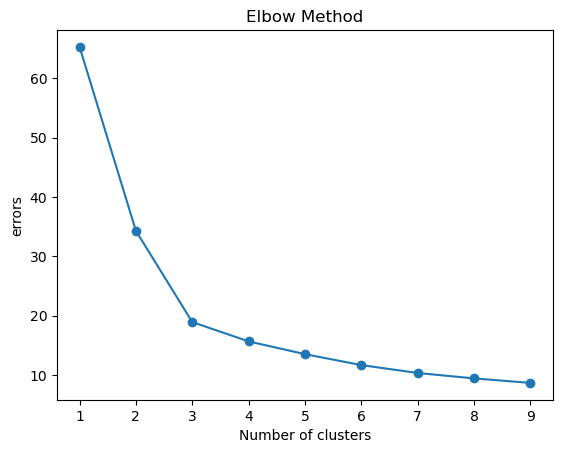

In [98]:
plt.plot(range(1,10), errors, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('errors')
plt.title('Elbow Method')
plt.show()

In [104]:
clusters = KMeans(n_clusters=3, random_state=25)
clusters.fit(df_norm_pca)

KMeans(n_clusters=3, random_state=25)

In [105]:
clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [106]:
df_og['cluster_id_kmeans'] = clusters.labels_

In [107]:
df_og[['Type', 'cluster_id_kmeans']]

,Type,cluster_id_kmeans
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1


In [112]:
df_og.groupby('cluster_id_kmeans').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_id_kmeans,,,,,,,,,,,,,,,
0,1.092308,13.656923,1.946154,2.437692,17.441538,106.584615,2.864615,2.970000,0.284308,1.923846,5.361692,1.071385,3.148923,1080.107692,1.846154
1,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824,0.960784
2,2.000000,12.202742,1.946774,2.249839,20.211290,93.451613,2.200806,2.038710,0.369032,1.607903,2.949355,1.056387,2.801129,502.709677,0.032258


In [113]:
df_og.groupby('Type').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster_id,cluster_id_kmeans
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,1.830508,0.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,0.225352,1.788732
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.979167,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

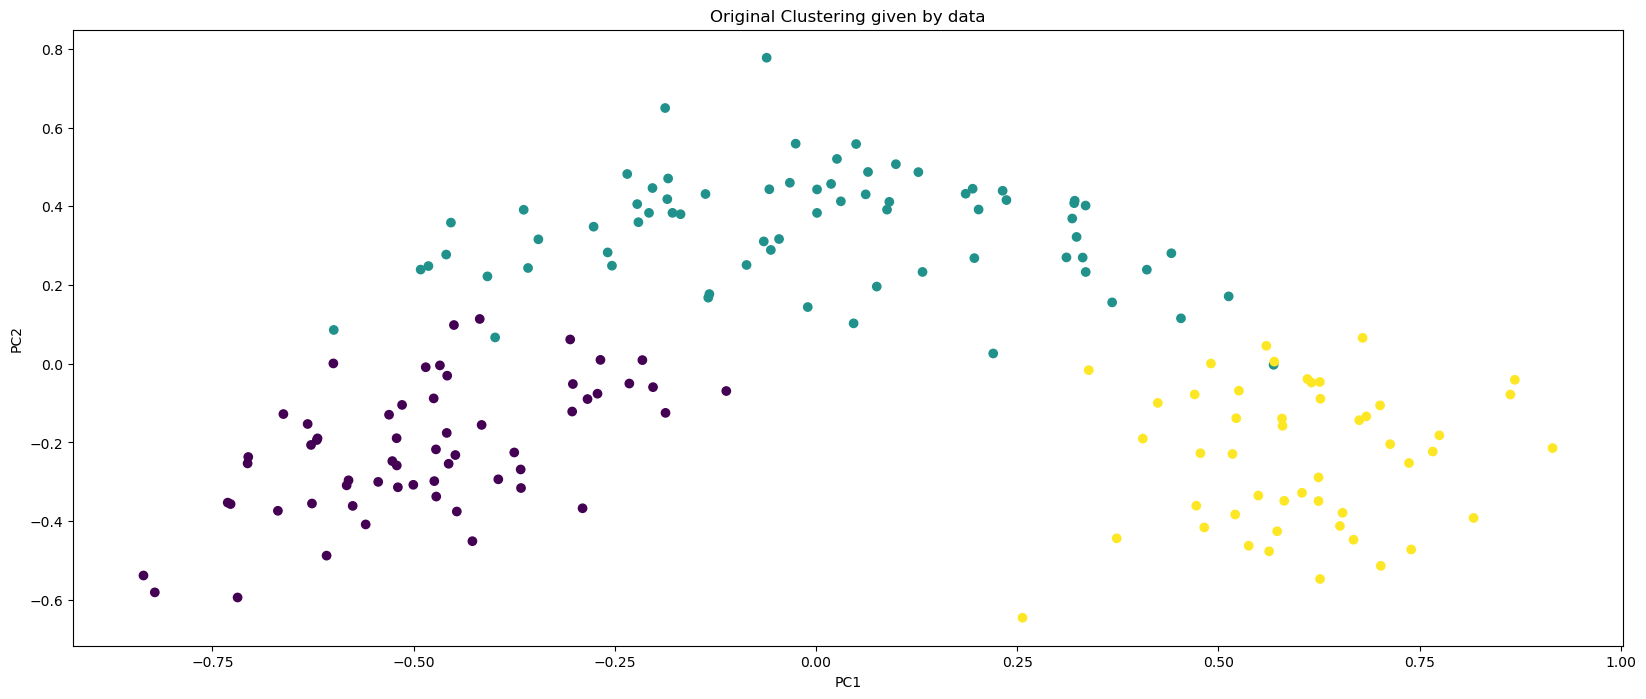

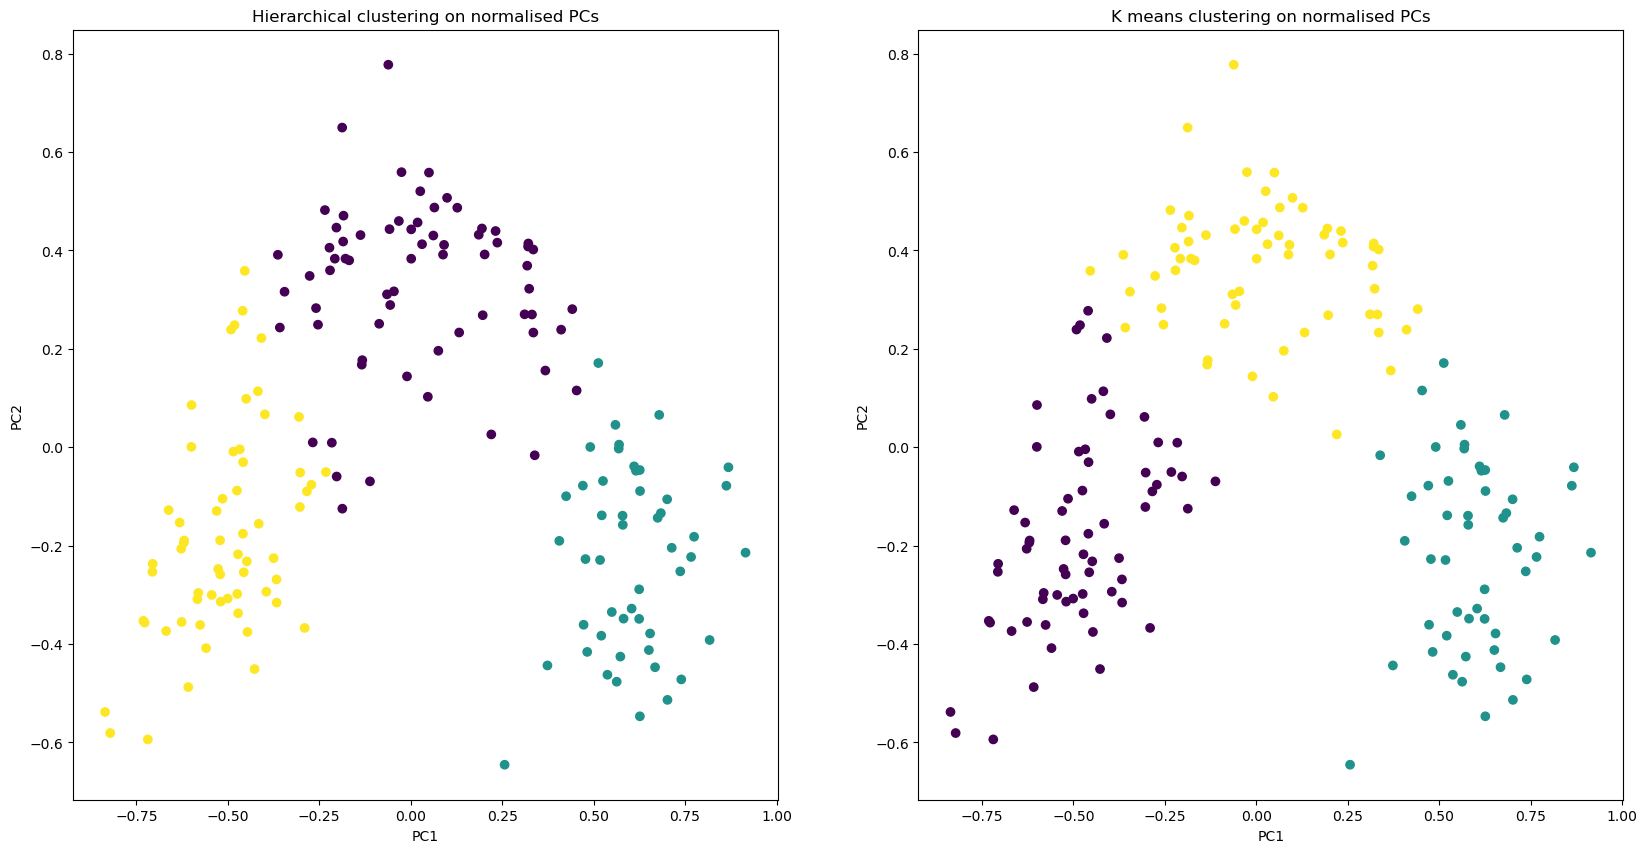

In [116]:
plt.figure(figsize=(20,8))
plt.scatter(df_norm_pca.iloc[:,0] , df_norm_pca.iloc[:,1], c=df_og.Type)
plt.title('Original Clustering given by data')
plt.xlabel('PC1')
plt.ylabel('PC2')


plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(df_norm_pca.iloc[:,0] , df_norm_pca.iloc[:,1], c=df_og.cluster_id)
plt.title('Hierarchical clustering on normalised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1,2,2)
plt.scatter(df_norm_pca.iloc[:,0] ,df_norm_pca.iloc[:,1], c=df_og.cluster_id_kmeans)
plt.title('K means clustering on normalised PCs')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show